<a href="https://colab.research.google.com/github/syphaxAouadene/Cours_programmation_concurrente/blob/main/classify_handwriten_digit_with_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import time
from IPython.display import clear_output
# import findspark
import json
import matplotlib.pyplot as plt
%pylab inline
import os

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from mlxtend.data import loadlocal_mnist
import platform

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
images_path = '/content/drive/MyDrive/Colab Notebooks/mnist_data/train-images.idx3-ubyte'
labels_path = '/content/drive/MyDrive/Colab Notebooks/mnist_data/train-labels.idx1-ubyte'
images, labels = loadlocal_mnist(images_path, labels_path)
images = images.reshape(60000, 28, 28)

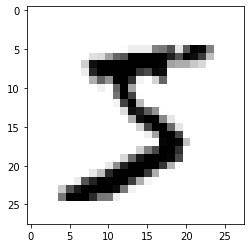

In [ ]:
plt.imshow(images[0], cmap=plt.cm.binary)
plt.show()

In [ ]:
len(images)

60000

# SOFTMAX

In [ ]:
def softmax(data):
    output = []
    for value in data:
        proba_value = np.exp(value)/(np.sum(np.exp(data)))
        output.append(proba_value)
    return np.array(output)


#SOFTMAX
input_to_softmax = output_of_fcl_3
output_of_softmax = softmax(input_to_softmax)

In [ ]:
output_of_softmax

array([3.26983175e-49, 6.03631488e-58, 6.03631488e-58, 4.84330231e-54,
       1.00000000e+00, 6.03631488e-58, 6.03631488e-58, 6.03631488e-58,
       6.03631488e-58, 6.03631488e-58])

In [ ]:
output_of_softmax.shape

(10,)

# CCE (CATEGORICAL_CROSS_ENTROPY)

In [ ]:
def categoricalCrossEntropy(generated_values, target_values):
    somme = 0
    for i in range(len(generated_values)):
        somme = somme + target_values[i] * np.log(generated_values[i])
    return (-1) * somme 

generated_values = output_of_softmax
target_values = np.eye(10)[labels[0]]
loss = categoricalCrossEntropy(generated_values, target_values)
loss

131.75214168640568

# BACKPROPAGATION

In [ ]:
dl_dofcl3 = generated_values - target_values

In [ ]:
def update_weights(dL_dY, weights, inputs, lrate):
    """
    arguments :
    dL_dY : un vecteur des dérivées de la couche supérieure par rapport a la couche de sortie Y de dimension n_outputs
    weights : la matrice des poids de dimension (n_inputs x n_outputs)
    inputs : le vecteur de sortie de la couche précedente de dimension n_inputs
    lrate : learning rate (scalar)
    """
    dL_dW = np.dot(np.transpose(inputs), dL_dY)
#     for xi in inputs:
#         dL_dW = np.concatenate((dL_dW, np.array(xi * dL_dY)))
    new_weights = flatten(weights) - lrate * flatten(dL_dW)
    return new_weights.reshape(weights.shape)

def calcul_dL_dX(dL_dY, weights):
    return np.dot(dL_dY, np.transpose(weights))


# new_w3 = update_weights(dl_dofcl3, w3, input_to_fcl_3, 0.01)
# dl_dofcl2 = calcul_dL_dX(dl_dofcl3, w3)
# # update w2
# new_w2 = update_weights(dl_dofcl2, w2, input_to_fcl_2, 0.01)
# dl_dofcl1 = calcul_dL_dX(dl_dofcl2, w2)
# # update w1
# new_w1 = update_weights(dl_dofcl1, w1, input_to_fcl_1, 0.01)


In [ ]:
new_w1.shape

(784, 20)

# second iteration :

epoch  0  -------> loss :  3.625925692120682  | time :  52.5753276348114
epoch  1  -------> loss :  2.3025266694919098  | time :  52.471380949020386
epoch  2  -------> loss :  2.301225821632795  | time :  52.84491443634033
epoch  3  -------> loss :  2.3012124931813767  | time :  53.2004292011261
epoch  4  -------> loss :  2.30121210410645  | time :  52.40338897705078
epoch  5  -------> loss :  2.301212073005699  | time :  53.16133904457092
epoch  6  -------> loss :  2.301212070071239  | time :  52.99147152900696
epoch  7  -------> loss :  2.301212069791412  | time :  53.43586254119873
epoch  8  -------> loss :  2.3012120697647154  | time :  51.93843078613281
epoch  9  -------> loss :  2.3012120697621636  | time :  51.75092053413391
--- 527.1399838924408 seconds ---  | time :  527.1399912834167


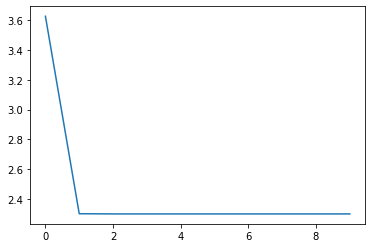

In [ ]:
def fcl(inputs_layer, nbr_neurons, weights, biais, activation_type='ReLU'):
    current_layer = []
    current_layer = flatten(np.dot(weights, inputs_layer) + biais) 
    output_layer = activation_function(current_layer, activation_type)
    
    return output_layer.reshape(len(output_layer), 1)

def fcl_softmax(inputs_layer, nbr_neurons, weights, biais, activation_type='ReLU'):
    current_layer = []
    current_layer = flatten(np.dot(weights, inputs_layer) + biais)
#     output_layer = activation_function(current_layer, activation_type)
    output_layer = current_layer
    return output_layer.reshape(len(output_layer), 1)
   
def activation_function(layer, type_of_activation='relu'):
    type_of_activation = type_of_activation.lower()
    switcher = {
        'relu': ReLU,
        'tanh': tanh,
        'segmoid': segmoid
    }
    # Get the function from switcher dictionary
    activation_type = switcher.get(type_of_activation, lambda: "Invalid type_of_activation_function, please choose either 'ReLU' or 'tanh' or 'segmoid' !")
    return activation_type(layer)
    
    
def ReLU(layer):
    return layer * (layer > 0)

def d_ReLU(layer):
    return 1. * (layer > 0)

def tanh(layer):
    r = (np.exp(layer)-np.exp(-1*layer))/(np.exp(layer)+np.exp(-1*layer))   
    return np.array(r)

def d_tanh(layer):
  return 1 - tanh(layer) * tanh(layer)

# def tanh(layer):
#     result = []
#     for y in layer:
#         r = (np.exp(y)-np.exp(-1*y))/(np.exp(y)+np.exp(-1*y))
#         result.append(r)
#     return np.array(result)

# def segmoid(layer):
#     result = []
#     for y in layer:
#         r = 1/(1+np.exp(-1*y))
#         result.append(r)
#     return np.array(result)

def segmoid(layer):
    # print(layer)
    return np.array(1/(1+np.exp(-1*layer)))

def softmax(data):
    output = []
    for value in data:
        proba_value = np.exp(value)/(np.sum(np.exp(data)))
        output.append(proba_value)
    return np.array(output)

def categoricalCrossEntropy(generated_values, target_values):
    somme = 0
    for i in range(len(generated_values)):
        somme = somme + target_values[i] * np.log(generated_values[i])
    return (-1) * somme 


def update_weights(dL_dY, weights, biais, inputs, lrate):
    """
    arguments :
    dL_dY : un vecteur des dérivées de la couche supérieure par rapport a la couche de sortie Y de dimension n_outputs
    weights : la matrice des poids de dimension (n_inputs x n_outputs)
    inputs : le vecteur de sortie de la couche précedente de dimension n_inputs
    lrate : learning rate (scalar)
    """
    dL_dW = np.dot(dL_dY, np.transpose(inputs))
    new_weights = flatten(weights) - lrate * flatten(dL_dW)
    # if (weights.flatten() == new_weights.flatten()).all():
    #   print('################## koko #################"')
    new_biais = biais - lrate * dL_dY
    return new_weights.reshape(weights.shape), new_biais

def calcul_dL_dX(dL_dY, weights):
    
    return np.dot(np.transpose(weights), dL_dY)

def normelize(img):
    return img/255

def flatten(img):
    return img.flatten()


def d_segmoid(vector):
    """
    cette fontion prend un vector en entrée et retourne la dérivée de segmoid par rapport a ce vector
    """
    return segmoid(vector) * (1 - segmoid(vector))


def show_image(img):
    plt.imshow(img, cmap=plt.cm.binary)
    plt.show()
    


# img = images[0]
# # on normalize notre image en divisant par 255 pour avoir des valeurs entre 0 et 1
# normelized_img = normelize(img)
# flatten_normelized_img = flatten(normelized_img)
# input_to_fcl_1 = np.array(flatten_normelized_img).reshape(len(flatten_normelized_img), 1)


start_time = time.time()

random.seed(10)
w1 = np.random.randn(128, 28*28)
random.seed(11)
b1 = np.random.randn(128, 1)

random.seed(12)
w2 = np.random.randn(10, 128)
random.seed(13)
b2 = np.random.randn(10, 1)

# random.seed(12)
# w3 = np.random.randn(10, 40)
# b3 = np.random.randn(10, 1)

losses = []
loss = 0
for j in range(10):
    batch_losses = []
    start_batch_time = time.time()
    for i in range(50000):
        
        img = images[i]
        # on normalize notre image end ivisant par 255 pour avoir des valeurs entre 0 et 1
        normelized_img = normelize(img)
        flatten_normelized_img = flatten(normelized_img)
        input_to_fcl_1 = np.array(flatten_normelized_img).reshape(len(flatten_normelized_img), 1)
        output_of_fcl_1 = fcl(input_to_fcl_1, 128, w1, b1, 'relu')
        input_to_fcl_2 = output_of_fcl_1
#         output_of_fcl_2 = fcl(input_to_fcl_2, 10, w2, b2, 'segmoid')
        output_of_fcl_2 = fcl_softmax(input_to_fcl_2, 10, w2, b2, 'relu')
#         input_to_fcl_3 = output_of_fcl_2
#         output_of_fcl_3 = fcl(input_to_fcl_3, 10, w3, b3, 'segmoid')
        # SOFTMAX
        input_to_softmax = output_of_fcl_2
        output_of_softmax = softmax(input_to_softmax)
        # CCE
        
        generated_values = output_of_softmax
#         print(generated_values)
        
        target_values = np.eye(10)[labels[i]].reshape(10, 1)
        loss = categoricalCrossEntropy(generated_values, target_values)
        batch_losses.append(loss)
        # BACKPROPAGATION
        dl_dofcl2 = generated_values - target_values
#         dl_dofcl2 = d_segmoid(dl_dofcl2)
        
#         new_w3 = update_weights(dl_dofcl3, w3, input_to_fcl_3, 0.1)
#         print(loss)
#         dl_dofcl2 = calcul_dL_dX(dl_dofcl3, w3)
#         dl_dofcl2 = d_segmoid(dl_dofcl2)
        # update w2
        new_w2, new_b2 = update_weights(dl_dofcl2, w2, b2, input_to_fcl_2, 0.0005)
        dl_dofcl1 = calcul_dL_dX(dl_dofcl2, w2)
        # dl_dofcl1 = d_tanh(dl_dofcl1)
        dl_dofcl1 = d_ReLU(dl_dofcl1)
        # update w1
        new_w1, new_b1 = update_weights(dl_dofcl1, w1, b1, input_to_fcl_1, 0.0005)
        w1 = new_w1
        w2 = new_w2
        b1 = new_b1
        b2 = new_b2
#         w3 = new_w3
    print('epoch ',j,' -------> loss : ',np.array(batch_losses).mean(), ' | time : ',(time.time() - start_batch_time))
    losses.append(np.array(batch_losses).mean())

print("--- %s seconds ---" % (time.time() - start_time), ' | time : ',(time.time() - start_time)) 
# gpu : 458.5637192726135 seconds ---
# tpu : --- 641.5484182834625 seconds ---
# cpu_myLapTop : --- 602.4395906925201 seconds ---
# cpu_googleColab : --- 583.7042846679688 seconds ---
plt.plot(losses)

In [ ]:
i, j

(49999, 5)

In [ ]:
def segmoid(layer):
    print(layer)
    return np.array(1/(1+np.exp(-1*layer)))

for i in range(50000):
  img = images[i]
  # on normalize notre image end ivisant par 255 pour avoir des valeurs entre 0 et 1
  normelized_img = normelize(img)
  flatten_normelized_img = flatten(normelized_img)
  input_to_fcl_1 = np.array(flatten_normelized_img).reshape(len(flatten_normelized_img), 1)
  output_of_fcl_1 = fcl(input_to_fcl_1, 128, w1, b1, 'segmoid')
  input_to_fcl_2 = output_of_fcl_1
  #         output_of_fcl_2 = fcl(input_to_fcl_2, 10, w2, b2, 'segmoid')
  output_of_fcl_2 = fcl_softmax(input_to_fcl_2, 10, w2, b2, 'segmoid')
  #         input_to_fcl_3 = output_of_fcl_2
  #         output_of_fcl_3 = fcl(input_to_fcl_3, 10, w3, b3, 'segmoid')
  # SOFTMAX
  input_to_softmax = output_of_fcl_2
  output_of_softmax = softmax(input_to_softmax)
  # CCE

  generated_values = output_of_softmax
  #         print(generated_values)

  target_values = np.eye(10)[labels[i]].reshape(10, 1)
  loss = categoricalCrossEntropy(generated_values, target_values)
  batch_losses.append(loss)
  # BACKPROPAGATION
  dl_dofcl2 = generated_values - target_values
  #         dl_dofcl2 = d_segmoid(dl_dofcl2)

  #         new_w3 = update_weights(dl_dofcl3, w3, input_to_fcl_3, 0.1)
  #         print(loss)
  #         dl_dofcl2 = calcul_dL_dX(dl_dofcl3, w3)
  #         dl_dofcl2 = d_segmoid(dl_dofcl2)
  # update w2
  new_w2, new_b2 = update_weights(dl_dofcl2, w2, b2, input_to_fcl_2, 0.0001)
  dl_dofcl1 = calcul_dL_dX(dl_dofcl2, w2)
  dl_dofcl1 = d_segmoid(dl_dofcl1)
  # update w1
  new_w1, new_b1 = update_weights(dl_dofcl1, w1, b1, input_to_fcl_1, 0.0001)
  w1 = new_w1
  w2 = new_w2
  b1 = new_b1
  b2 = new_b2
  #         w3 = new_w3

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
 [ 0.53622282]
 [-0.19196016]
 [-0.26714185]
 [-0.72712337]
 [ 0.69577339]
 [ 0.08119394]
 [ 0.6425415 ]
 [ 1.44458389]
 [ 0.6214675 ]
 [ 1.40320893]
 [ 0.65302885]
 [-0.15051739]
 [ 0.46599252]
 [-1.14287892]
 [-1.4684795 ]
 [ 1.45924781]
 [ 0.17004191]
 [ 1.24373261]
 [-0.83949096]
 [ 0.15085436]
 [-1.22427647]
 [-0.00974395]
 [-0.30012342]
 [ 0.4560237 ]
 [ 1.94787218]
 [ 1.56687273]
 [ 1.08939363]
 [-0.07454296]
 [ 0.3299318 ]
 [-1.76826995]
 [-0.18113872]
 [-1.29205555]
 [ 0.11649248]
 [-0.90334962]
 [ 1.28665434]
 [-0.27608047]
 [ 0.85384749]
 [-0.12712057]
 [-1.90881897]
 [ 1.37462606]
 [ 0.853462  ]
 [-0.41539128]
 [ 0.27786174]
 [ 0.6923526 ]
 [-0.93114182]
 [ 0.10488415]
 [-1.05605494]
 [-0.4612278 ]
 [ 0.95158555]
 [-0.17430614]
 [-0.89829254]
 [ 1.42787712]
 [ 0.16356426]
 [-0.81631655]
 [-0.85341601]
 [-0.69673695]
 [ 0.66486536]
 [-1.46625126]
 [ 0.94227118]
 [-0.01683732]
 [ 0.55712531]
 [ 0.22

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
 [-2.65355879]
 [ 0.33313326]
 [ 0.72439958]
 [-0.03160722]
 [-1.65931177]
 [ 0.33329082]
 [ 0.67935941]
 [-0.48721111]
 [-0.92209445]
 [-1.77374454]
 [ 0.63806737]
 [ 1.57023637]
 [-0.01662542]
 [-0.18649164]
 [ 2.13144226]
 [ 0.12207525]
 [-0.7262134 ]
 [ 0.71332134]
 [-0.78686927]
 [ 0.10479059]
 [-1.00031835]
 [-0.17106081]
 [ 0.13168134]
 [-1.10718444]
 [-0.07452666]
 [ 0.17306489]
 [-0.9856472 ]
 [-0.09657762]
 [-0.30738328]
 [ 0.46953059]
 [ 0.60760327]
 [-2.10585147]
 [-0.74912429]
 [-1.13298954]
 [-0.75628251]
 [ 0.14078443]
 [-0.28710281]
 [-0.03376756]
 [-0.37342799]
 [-1.20438647]
 [ 0.76833909]
 [-0.4366378 ]
 [-0.42794106]
 [-0.54543799]
 [ 0.35053961]
 [-0.44937137]
 [-0.39018783]
 [-0.13041074]
 [-0.30254   ]
 [-0.1828923 ]
 [-0.16583935]
 [ 0.07579559]
 [ 1.11831822]
 [-0.0420182 ]
 [-0.55339332]
 [-0.23549046]
 [ 0.00539681]
 [-0.17205121]
 [ 0.09616062]
 [-0.69520812]
 [-1.05650938]
 [ 0.29

In [ ]:
gh = np.array([[-0.62243979],[-0.64890402],[-0.64894397],[-0.63831575],[-0.65677234],[-0.71725423],[-0.60694273],[-0.58704055],[-0.68332106],[-0.60008736]])
gh = np.array([[-0.62519592],
 [-0.6392617 ],
 [-0.64638854],
 [-0.63600285],
 [-0.65850884],
 [-0.71987952],
 [-0.61135832],
 [-0.58707766],
 [-0.68041229],
 [-0.60593614]])
gh

array([[-0.62519592],
       [-0.6392617 ],
       [-0.64638854],
       [-0.63600285],
       [-0.65850884],
       [-0.71987952],
       [-0.61135832],
       [-0.58707766],
       [-0.68041229],
       [-0.60593614]])

In [ ]:
softmax(gh)

[[-0.62519592]
 [-0.6392617 ]
 [-0.64638854]
 [-0.63600285]
 [-0.65850884]
 [-0.71987952]
 [-0.61135832]
 [-0.58707766]
 [-0.68041229]
 [-0.60593614]]


array([[0.10152567],
       [0.10010763],
       [0.09939672],
       [0.1004344 ],
       [0.09819927],
       [0.09235391],
       [0.10294031],
       [0.10547036],
       [0.09607175],
       [0.10349999]])

In [ ]:
np.exp(np.array([-1000, -1000, -2000, -3000, -4000]))

array([0., 0., 0., 0., 0.])

In [ ]:
hh = np.array([[ 2.06629636],
 [-0.24161727],
 [-1.62032236],
 [ 0.14701684],
 [ 0.35930188],
 [-0.06650588],
 [ 0.53917158],
 [ 0.77077588],
 [-0.69659192],
 [ 0.18209319],
 [ 1.00158273],
 [ 1.23111498],
 [-1.64465304],
 [-0.02469326],
 [ 1.95918779],
 [-0.45273304],
 [-0.58809222],
 [ 0.21055277],
 [ 1.70808372],
 [-2.2637225 ],
 [-0.47372457],
 [ 0.13453479],
 [-0.43198449],
 [ 0.45237405],
 [ 0.74030381],
 [-1.0737039 ],
 [ 1.43698578],
 [-0.62672367],
 [-0.19982386],
 [-0.34952051],
 [-0.5169316 ],
 [-1.9125661 ],
 [-0.95110915],
 [-1.3012016 ],
 [ 0.55442608],
 [-0.65645242],
 [ 0.29366459],
 [ 1.40605787],
 [-0.06641396],
 [-0.19870844],
 [-1.50424638],
 [ 2.12578338],
 [-0.54147233],
 [-0.27535701],
 [-0.25913012],
 [-1.41801198],
 [ 0.68832169],
 [-0.29691151],
 [-0.35515016],
 [-0.36609294],
 [ 0.61522615],
 [ 0.15493021],
 [-0.3355263 ],
 [ 0.29547081],
 [ 0.10489655],
 [ 0.54619477],
 [-1.14186739],
 [ 0.23279674],
 [-0.15463748],
 [-0.22419602],
 [-0.33422794],
 [-0.75901328],
 [-0.045198  ],
 [-1.29406025],
 [-0.49733156],
 [-0.89132602],
 [ 1.04820037],
 [-0.20864507],
 [-1.25383541],
 [ 0.07394834],
 [ 0.58446548],
 [ 0.85947135],
 [ 0.64643833],
 [ 0.11570639],
 [ 0.99949301],
 [-1.52947266],
 [ 0.30751446],
 [-0.71559514],
 [-0.08093049],
 [-0.09567195],
 [-2.14151224],
 [ 0.93423986],
 [ 0.33209575],
 [ 1.88753626],
 [ 0.59941471],
 [-1.24639308],
 [ 0.15583961],
 [ 0.7524334 ],
 [ 1.48443483],
 [ 0.13498923],
 [-0.29877764],
 [ 0.28588946],
 [ 0.42500233],
 [-1.51415028],
 [-0.32857025],
 [ 0.21848427],
 [ 1.00175867],
 [ 1.35990094],
 [-1.86586294],
 [ 0.91531953],
 [-0.18219577],
 [ 0.22418017],
 [ 0.38367113],
 [-1.03801596],
 [ 0.87076074],
 [-1.13978371],
 [ 0.25463167],
 [ 0.17493883],
 [-0.52064957],
 [ 0.93876892],
 [-1.55517165],
 [-0.8100037 ],
 [ 1.74623657],
 [-1.20139794],
 [-1.35851346],
 [-0.02160478],
 [ 0.11426785],
 [ 0.15789948],
 [ 1.84145173],
 [-0.16378251],
 [-0.89123585],
 [ 0.78230461],
 [-0.83219285],
 [-1.97236831],
 [ 0.8509003 ],
 [ 1.76430979],
 [ 0.2184053 ],
 [-0.95101688]])

In [ ]:
segmoid(hh)

[[ 2.06629636]
 [-0.24161727]
 [-1.62032236]
 [ 0.14701684]
 [ 0.35930188]
 [-0.06650588]
 [ 0.53917158]
 [ 0.77077588]
 [-0.69659192]
 [ 0.18209319]
 [ 1.00158273]
 [ 1.23111498]
 [-1.64465304]
 [-0.02469326]
 [ 1.95918779]
 [-0.45273304]
 [-0.58809222]
 [ 0.21055277]
 [ 1.70808372]
 [-2.2637225 ]
 [-0.47372457]
 [ 0.13453479]
 [-0.43198449]
 [ 0.45237405]
 [ 0.74030381]
 [-1.0737039 ]
 [ 1.43698578]
 [-0.62672367]
 [-0.19982386]
 [-0.34952051]
 [-0.5169316 ]
 [-1.9125661 ]
 [-0.95110915]
 [-1.3012016 ]
 [ 0.55442608]
 [-0.65645242]
 [ 0.29366459]
 [ 1.40605787]
 [-0.06641396]
 [-0.19870844]
 [-1.50424638]
 [ 2.12578338]
 [-0.54147233]
 [-0.27535701]
 [-0.25913012]
 [-1.41801198]
 [ 0.68832169]
 [-0.29691151]
 [-0.35515016]
 [-0.36609294]
 [ 0.61522615]
 [ 0.15493021]
 [-0.3355263 ]
 [ 0.29547081]
 [ 0.10489655]
 [ 0.54619477]
 [-1.14186739]
 [ 0.23279674]
 [-0.15463748]
 [-0.22419602]
 [-0.33422794]
 [-0.75901328]
 [-0.045198  ]
 [-1.29406025]
 [-0.49733156]
 [-0.89132602]
 [ 1.04820

array([[0.88758395],
       [0.43988784],
       [0.16516042],
       [0.53668815],
       [0.58887143],
       [0.48337966],
       [0.63161969],
       [0.68368871],
       [0.33256828],
       [0.54539793],
       [0.73136965],
       [0.77401366],
       [0.16183292],
       [0.493827  ],
       [0.87644503],
       [0.38871116],
       [0.35707271],
       [0.55244459],
       [0.84658757],
       [0.09417235],
       [0.38373507],
       [0.53358306],
       [0.39365255],
       [0.61120354],
       [0.67706229],
       [0.25469934],
       [0.80798745],
       [0.34825381],
       [0.4502096 ],
       [0.4134987 ],
       [0.37357001],
       [0.12869284],
       [0.27866182],
       [0.21396286],
       [0.63516186],
       [0.34153698],
       [0.57289305],
       [0.80314342],
       [0.48340261],
       [0.45048571],
       [0.18179305],
       [0.89338405],
       [0.36784515],
       [0.43159243],
       [0.43557756],
       [0.19497343],
       [0.66559347],
       [0.426

In [ ]:
def classify(img, w1, w2, b1, b2):
    # on normalize notre image end ivisant par 255 pour avoir des valeurs entre 0 et 1
    normelized_img = normelize(img)
    flatten_normelized_img = flatten(normelized_img)
    input_to_fcl_1 = np.array(flatten_normelized_img).reshape(len(flatten_normelized_img), 1)
#     print(input_to_fcl_1)
    output_of_fcl_1 = fcl(input_to_fcl_1, 128, w1, b1, 'segmoid')
    # print(output_of_fcl_1)
    input_to_fcl_2 = output_of_fcl_1
#     print(input_to_fcl_2)
#         output_of_fcl_2 = fcl(input_to_fcl_2, 10, w2, b2, 'segmoid')
    output_of_fcl_2 = fcl_softmax(input_to_fcl_2, 10, w2, b2, 'segmoid')
#         input_to_fcl_3 = output_of_fcl_2
#         output_of_fcl_3 = fcl(input_to_fcl_3, 10, w3, b3, 'segmoid')
    # SOFTMAX
    input_to_softmax = output_of_fcl_2
#     print(input_to_softmax)
    output_of_softmax = softmax(input_to_softmax)
    # CCE
    print(output_of_softmax)
#     print(output_of_softmax)
    return output_of_softmax.argmax()

classify(images[50202], w1, w2, b1, b2)

[[0.09927115]
 [0.11074163]
 [0.09954261]
 [0.10156663]
 [0.09729269]
 [0.09077401]
 [0.09981214]
 [0.103788  ]
 [0.09676999]
 [0.10044115]]


1

In [ ]:
classify(images[50203], w1, w2, b1, b2)

[[0.09927115]
 [0.11074163]
 [0.09954261]
 [0.10156663]
 [0.09729269]
 [0.09077401]
 [0.09981214]
 [0.103788  ]
 [0.09676999]
 [0.10044115]]


1

In [ ]:
w1.shape

(128, 784)

In [ ]:
w2.shape

(10, 128)

In [ ]:
output_of_softmax

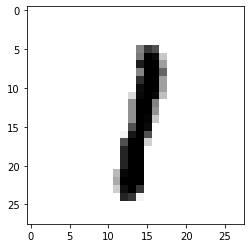

In [ ]:
show_image(images[1200])

In [ ]:
print(target_values)

[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [ ]:
print(generated_values.max())

[[0.09999801]
 [0.10000105]
 [0.09999988]
 [0.10000037]
 [0.09999894]
 [0.10000223]
 [0.10000098]
 [0.09999931]
 [0.10000064]
 [0.09999859]]


In [ ]:
softmax(np.array([1, 5, 8, 2, 3]))

0.9999999999999999

In [ ]:
np.eye(10)[labels[i]].reshape(10, 1) - np.eye(10)[labels[i+1]].reshape(10, 1)

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [-1.],
       [ 0.],
       [ 0.]])

In [ ]:
np.eye(10)[labels[i]].reshape(10, 1)

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
np.eye(10)[labels[i+1]].reshape(10, 1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [ ]:
input_to_fcl_1.shape, w1.shape, b1.shape

((784, 1), (20, 784), (20, 1))

In [ ]:
r = w1 @ input_to_fcl_1 + b1

In [ ]:
r

array([[  0.88969633],
       [  4.88988732],
       [-10.84785368],
       [ -4.50095486],
       [-10.47931191],
       [-17.70796624],
       [ -0.25051007],
       [  2.85498299],
       [-20.91983214],
       [  5.25095088],
       [-11.2121299 ],
       [  6.10995497],
       [  2.43014654],
       [  7.46951597],
       [ -8.45902601],
       [  3.36997951],
       [ 20.16755015],
       [ -8.39808377],
       [-14.74800446],
       [-12.29659989]])

In [ ]:
input_to_fcl_1 = input_to_fcl_1.reshape(784, 1)
len(input_to_fcl_1)

784

In [ ]:
np.dot(np.array([[1, 0, 2, 1], [1, 0, 2, 1]]),np.array([1, 0, 0, -1]))

array([0, 0])

In [ ]:
np.array([[1, 0, 2, 1], 
          [1, 0, 2, 1]]).shape

(2, 4)

In [ ]:
np.array([1, 0, 0, -1]).shape

(4,)

In [ ]:
array([0, 0]).shape

(2,)

In [ ]:
input

(10,)

In [ ]:
w3.shape

(40, 10)

In [ ]:
np.dot(dl_dofcl3, np.transpose(w3))

array([ 2.28786417,  1.46450616,  1.05897324, -0.32715615,  0.24767303,
        1.05235776,  0.33334091, -0.16522891,  2.82982226,  1.24156754,
        0.31434018,  1.09229905, -1.01563311,  0.14574384,  0.62109842,
       -1.40675985, -2.19592394,  0.96302175, -0.82410076, -0.1218309 ,
        2.54821204, -0.61679144,  1.11933962, -2.16353162,  1.40420778,
        0.90169054, -0.06876943,  0.53106589, -0.78919505,  0.62570222,
        0.4593308 ,  0.6225038 ,  2.33236216,  0.01032622, -1.79474261,
        0.94757298, -1.70093578,  0.52757663,  2.12776526, -2.03334173])

In [ ]:
input_to_fcl_3.shape

(40,)

In [ ]:
[]+[1]

[1]

In [ ]:
flatten(w3).shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
np.array([1, 2])+2

array([3, 4])

In [ ]:
np.random.randn(len(input_to_fcl_1), 20)

array([[ 0.33996308, -0.46392675,  0.13859013, ..., -0.21318384,
        -0.77499796, -0.10204053],
       [-2.09183923,  2.40373762,  0.82983141, ..., -0.03552167,
         0.89900548,  0.14521757],
       [ 0.9237172 ,  0.03362614,  0.51766469, ..., -0.3851908 ,
         0.62839916, -0.34721112],
       ...,
       [ 0.07703711,  0.87632305,  0.05845043, ..., -0.13319593,
        -1.39184347,  0.1024183 ],
       [ 0.09572297, -0.25740828,  0.11995572, ...,  0.94327382,
        -0.32409054, -0.58635137],
       [ 0.67120898, -0.13267251, -0.45717134, ...,  1.60735958,
        -0.55673492,  0.95279747]])

In [ ]:
np.random.randn(20)